In [6]:
%config Completer.use_jedi = False

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, InputLayer, Bidirectional, Dense
from tensorflow.keras.datasets import mnist

import numpy as np
import matplotlib.pyplot as plt

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [9]:
x_train = x_train.reshape([-1, 28, 28]).astype("float32") / 255.0
x_test = x_test.reshape([-1, 28, 28]).astype("float32") / 255.0

In [22]:
model = keras.Sequential()
model.add(InputLayer(input_shape=(None, 28)))
model.add(GRU(256, return_sequences=True, activation="tanh", recurrent_activation = 'sigmoid', reset_after = True, use_bias = True, recurrent_dropout = 0, unroll = False))
model.add(GRU(256, activation='tanh', recurrent_activation = 'sigmoid', reset_after = True, use_bias = True, recurrent_dropout = 0, unroll = False))
model.add(Dense(10))

In [23]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_8 (GRU)                  (None, None, 256)         219648    
_________________________________________________________________
gru_9 (GRU)                  (None, 256)               394752    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 616,970
Trainable params: 616,970
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
)

In [25]:
EPOCHS = 10

In [26]:
history = model.fit(x_train, y_train, batch_size=64, epochs=EPOCHS, verbose=2)

Epoch 1/10
938/938 - 22s - loss: 0.2718 - accuracy: 0.9111
Epoch 2/10
938/938 - 20s - loss: 0.0661 - accuracy: 0.9797
Epoch 3/10
938/938 - 21s - loss: 0.0465 - accuracy: 0.9857
Epoch 4/10
938/938 - 23s - loss: 0.0329 - accuracy: 0.9899
Epoch 5/10
938/938 - 20s - loss: 0.0316 - accuracy: 0.9897
Epoch 6/10
938/938 - 21s - loss: 0.0236 - accuracy: 0.9926
Epoch 7/10
938/938 - 20s - loss: 0.0218 - accuracy: 0.9933
Epoch 8/10
938/938 - 19s - loss: 0.0197 - accuracy: 0.9936
Epoch 9/10
938/938 - 20s - loss: 0.0165 - accuracy: 0.9949
Epoch 10/10
938/938 - 21s - loss: 0.0131 - accuracy: 0.9960


In [27]:
acc = history.history['accuracy']
loss=history.history['loss']
print(acc)
print(loss)

[0.9110666513442993, 0.9796500205993652, 0.9857000112533569, 0.9898999929428101, 0.9897333383560181, 0.9925666451454163, 0.9932500123977661, 0.9936000108718872, 0.994866669178009, 0.9959666728973389]
[0.271767795085907, 0.06607511639595032, 0.04650513082742691, 0.03285067155957222, 0.03161533549427986, 0.0236044991761446, 0.021834973245859146, 0.01966620422899723, 0.016494326293468475, 0.01309779193252325]


Text(0.5, 1.0, 'Training Accuracy and Loss')

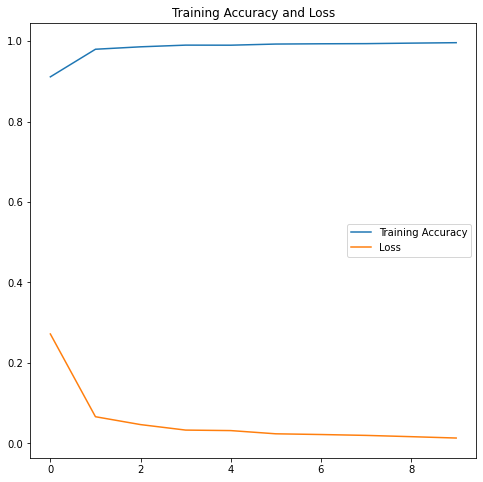

In [28]:
epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, loss, label='Loss')
plt.legend(loc='center right')
plt.title('Training Accuracy and Loss')

In [29]:
model.evaluate(x_test, y_test, batch_size=64, verbose=2)

157/157 - 2s - loss: 0.0660 - accuracy: 0.9795


[0.06602592766284943, 0.9794999957084656]

In [31]:
model.save('saved_models/gru_model.h5')